# **Метод k-ближайших соседей**

## Содержание
1. Описание датасета. Загрузка данных.
2. Разделение выборки на тестовую и обучающую. Масштабирование данных
3. Результаты с произвольно выбранным К.
4. Подбор гиперпараметра К с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации.
5. Сравнение метрики качества исходной и оптимальной моделей.

## 1. Описание датасета

Возьмем уже известный датасет из [1ой лабораторной](https://github.com/KZLZG/TML/blob/main/Lab1/lab-1.ipynb), мы уже его проанализировали.

#### Импорт библиотек

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas.

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV, столбцы разделены табуляцией

In [3]:
data = pd.read_csv('../Lab1/diabet.txt', sep="	")

In [4]:
# Напомним себе содержание датасета
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Для целей обучения и удобства визуализации я в начале возьму в качестве известных признаков BMI & BP. Результирующим параметром у нас является параметр Y

In [5]:
data_for_lab = data[['BMI', 'BP', 'Y']]

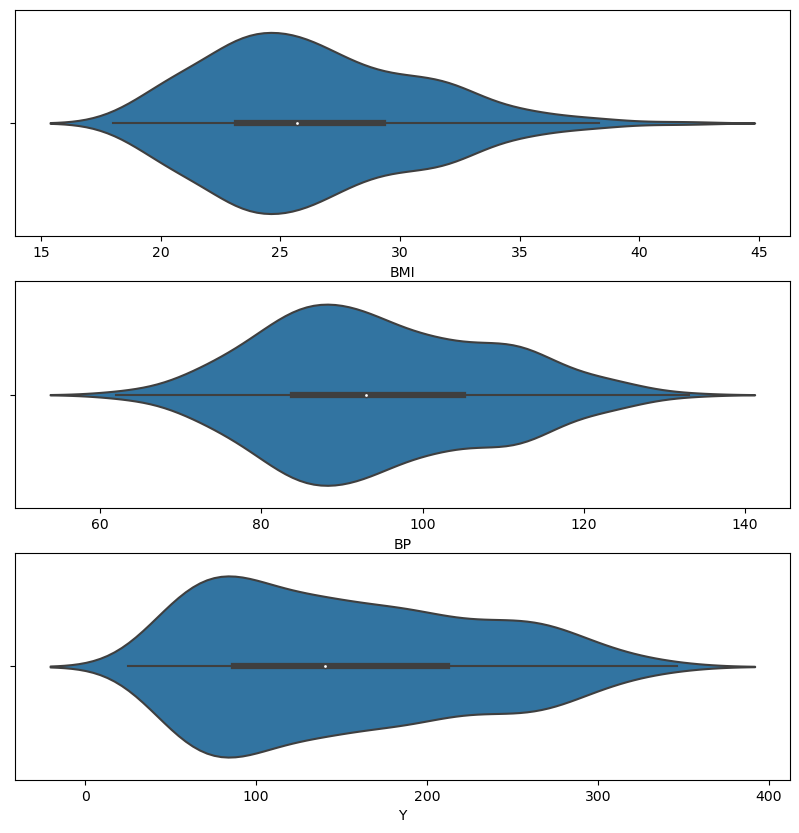

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data_for_lab['BMI'])
sns.violinplot(ax=ax[1], x=data_for_lab['BP'])
sns.violinplot(ax=ax[2], x=data_for_lab['Y'])
plt.show()

Можем заметить что признаки отличаются друг от друга по масштабу, поэтому необходимо привести их к единому методом стандартизации, так как это оптимальный способ масштабирования для нашего метода. 

In [35]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data_for_lab.drop('Y', axis=1))
scaled_data = pd.DataFrame(scaled, columns = data_for_lab.drop('Y', axis=1).columns)

## 2. Разделение выборки на тестовую и обучающую.

Выполним разбиение с поомщью функции sklearn.model_selection.train_test_split, объем тестовой выборки зададим равным 0.2 от общего объема.

In [39]:
x = scaled_data
y = data_for_lab['Y']
#training, testing = train_test_split(scaled_data, test_size=0.2, random_state=42)
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)


In [25]:
#scaled = scaler.transform(training.drop('Y', axis=1))
#scaled = scaler.transform(training)
#scaled_data = pd.DataFrame(scaled, columns = training.columns)
#print(scaled_data['BMI'].max(), scaled_data['BP'].max())

-2.346656049389597

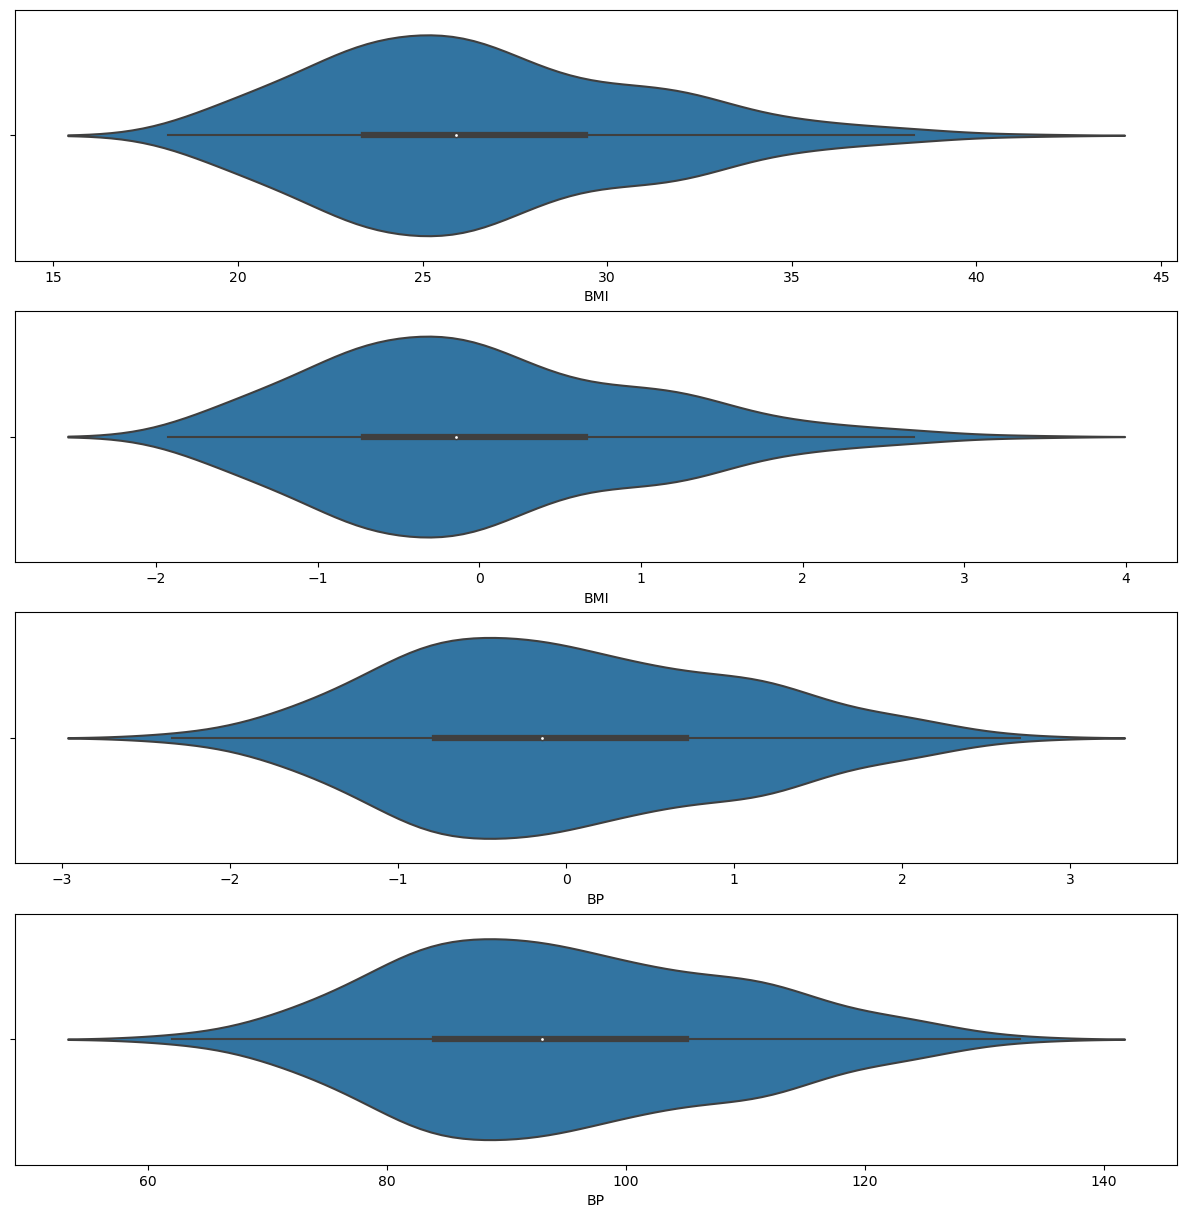

In [30]:
fig, ax = plt.subplots(4, 1, figsize=(15, 15))
sns.violinplot(ax=ax[0], x=training['BMI'])
sns.violinplot(ax=ax[1], x=scaled_data['BMI'])
sns.violinplot(ax=ax[2], x=scaled_data['BP'])
sns.violinplot(ax=ax[3], x=training['BP'])

plt.show()

## Обучение

In [64]:
KNeighborsRegressorObj = KNeighborsRegressor(n_neighbors=100) 
KNeighborsRegressorObj.fit(x_training_data, y_training_data)
y_predictions = KNeighborsRegressorObj.predict(x_test_data)
aboba

In [65]:
print(
r2_score(y_test_data, y_predictions, multioutput='raw_values'),
mean_absolute_error(y_test_data, y_predictions, multioutput='raw_values'),
mean_squared_error(y_test_data, y_predictions, multioutput='raw_values'))

[0.27463977] [50.36729323] [3783.97835865]


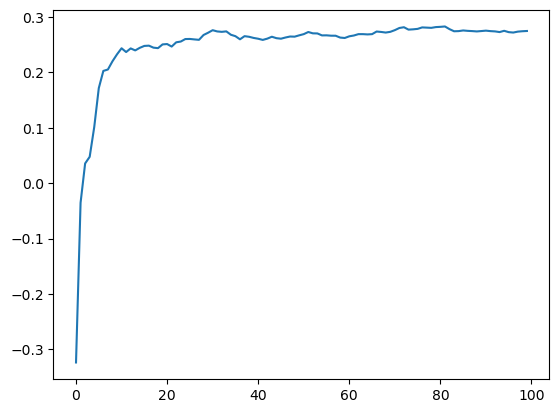

In [70]:
error_rates = []
for i in np.arange(1, 101):
    new_model = KNeighborsRegressor(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(r2_score(y_test_data, new_predictions))
plt.plot(error_rates)